In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn import linear_model
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('data1.csv')

In [3]:
print(dataset.columns)

Index(['request_datetime', 'msg_size', 'request_time_ms', 'request_ret',
       'cpu_usage_active', 'disk_used_percent', 'mem_available_percent',
       'influxdb_memstats_sys', 'influxdb_memstats_heap_inuse',
       'influxdb_shard_diskBytes', 'influxdb_shard_writeBytes',
       'influxdb_database_numSeries', 'influxdb_httpd_writeReqBytes',
       'influxdb_httpd_writeReqDurationNs', 'influxdb_httpd_writeReq',
       'influxdb_httpd_writeReqActive'],
      dtype='object')


In [4]:
dataset.drop('request_datetime',inplace=True, axis=1)

In [5]:
print(dataset.columns)

Index(['msg_size', 'request_time_ms', 'request_ret', 'cpu_usage_active',
       'disk_used_percent', 'mem_available_percent', 'influxdb_memstats_sys',
       'influxdb_memstats_heap_inuse', 'influxdb_shard_diskBytes',
       'influxdb_shard_writeBytes', 'influxdb_database_numSeries',
       'influxdb_httpd_writeReqBytes', 'influxdb_httpd_writeReqDurationNs',
       'influxdb_httpd_writeReq', 'influxdb_httpd_writeReqActive'],
      dtype='object')


In [6]:
standardScaler = StandardScaler()
scale_all = ['msg_size', 'request_time_ms', 'request_ret', 'cpu_usage_active',
       'disk_used_percent', 'mem_available_percent', 'influxdb_memstats_sys',
       'influxdb_memstats_heap_inuse', 'influxdb_shard_diskBytes',
       'influxdb_shard_writeBytes', 'influxdb_database_numSeries',
       'influxdb_httpd_writeReqBytes', 'influxdb_httpd_writeReqDurationNs',
       'influxdb_httpd_writeReq', 'influxdb_httpd_writeReqActive']
dataset[scale_all] = standardScaler.fit_transform(dataset[scale_all])


In [7]:
y1 = dataset['influxdb_shard_diskBytes']
y2 = dataset['cpu_usage_active']
y3 = dataset['disk_used_percent']

X1 = dataset[['msg_size', 'request_time_ms', 'request_ret', 'cpu_usage_active',
       'disk_used_percent', 'mem_available_percent', 'influxdb_memstats_sys',
       'influxdb_memstats_heap_inuse',
       'influxdb_shard_writeBytes', 'influxdb_database_numSeries',
       'influxdb_httpd_writeReqBytes', 'influxdb_httpd_writeReqDurationNs',
       'influxdb_httpd_writeReq', 'influxdb_httpd_writeReqActive']]

x2 = dataset[['msg_size', 'request_time_ms', 'request_ret', 
       'disk_used_percent', 'mem_available_percent', 'influxdb_memstats_sys',
       'influxdb_memstats_heap_inuse', 'influxdb_shard_diskBytes',
       'influxdb_shard_writeBytes', 'influxdb_database_numSeries',
       'influxdb_httpd_writeReqBytes', 'influxdb_httpd_writeReqDurationNs',
       'influxdb_httpd_writeReq', 'influxdb_httpd_writeReqActive']]

x3 =dataset[['msg_size', 'request_time_ms', 'request_ret', 'cpu_usage_active',
        'mem_available_percent', 'influxdb_memstats_sys',
       'influxdb_memstats_heap_inuse', 'influxdb_shard_diskBytes',
       'influxdb_shard_writeBytes', 'influxdb_database_numSeries',
       'influxdb_httpd_writeReqBytes', 'influxdb_httpd_writeReqDurationNs',
       'influxdb_httpd_writeReq', 'influxdb_httpd_writeReqActive']]

In [8]:
print(X1.columns)
print("\n")
print(x2.columns)
print("\n")
print(x3.columns)

Index(['msg_size', 'request_time_ms', 'request_ret', 'cpu_usage_active',
       'disk_used_percent', 'mem_available_percent', 'influxdb_memstats_sys',
       'influxdb_memstats_heap_inuse', 'influxdb_shard_writeBytes',
       'influxdb_database_numSeries', 'influxdb_httpd_writeReqBytes',
       'influxdb_httpd_writeReqDurationNs', 'influxdb_httpd_writeReq',
       'influxdb_httpd_writeReqActive'],
      dtype='object')


Index(['msg_size', 'request_time_ms', 'request_ret', 'disk_used_percent',
       'mem_available_percent', 'influxdb_memstats_sys',
       'influxdb_memstats_heap_inuse', 'influxdb_shard_diskBytes',
       'influxdb_shard_writeBytes', 'influxdb_database_numSeries',
       'influxdb_httpd_writeReqBytes', 'influxdb_httpd_writeReqDurationNs',
       'influxdb_httpd_writeReq', 'influxdb_httpd_writeReqActive'],
      dtype='object')


Index(['msg_size', 'request_time_ms', 'request_ret', 'cpu_usage_active',
       'mem_available_percent', 'influxdb_memstats_sys',
       'infl

In [9]:
print(y1)
print("\n")
print(y2)
print("\n")
print(y3)

0      -2.033295
1      -2.032613
2      -2.031928
3      -2.031241
4      -2.030564
          ...   
7149    1.063537
7150    1.064216
7151    1.064907
7152    1.065602
7153    1.066297
Name: influxdb_shard_diskBytes, Length: 7154, dtype: float64


0       7.352236
1      -0.010493
2       0.390265
3       1.449042
4       0.269471
          ...   
7149   -0.843078
7150    0.255198
7151    1.071168
7152   -0.158416
7153    0.522236
Name: cpu_usage_active, Length: 7154, dtype: float64


0       0.411455
1       0.478087
2       0.478339
3       0.478675
4       0.478843
          ...   
7149    1.160878
7150    1.161130
7151    1.161382
7152    1.162054
7153    1.162307
Name: disk_used_percent, Length: 7154, dtype: float64


# Linear Regression

In [10]:
X1 = np.array(X1)
y1 = np.array(y1)

X2 = np.array(x2)
y2 = np.array(y2)

X3 = np.array(x3)
y3 = np.array(y3)

x1_train,x1_test,y1_train,y1_test = train_test_split(X1, y1, test_size = 0.2,random_state=1)
x2_train,x2_test,y2_train,y2_test = train_test_split(X2, y2, test_size = 0.2,random_state=1)
x3_train,x3_test,y3_train,y3_test = train_test_split(X3, y3, test_size = 0.2,random_state=1)


In [11]:
lin_model1 = LinearRegression()
lin_model2 = LinearRegression()
lin_model3 = LinearRegression()

print(lin_model1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [12]:
lin_model1 = lin_model1.fit(x1_train,y1_train)
lin_model2 = lin_model2.fit(x2_train,y2_train)
lin_model3 = lin_model3.fit(x3_train,y3_train)

In [13]:
y1_pred = lin_model1.predict(x1_test)
print("\nPredicted 'influxdb_shard_diskBytes' \n",y1_pred)
y2_pred = lin_model2.predict(x2_test)
print("\nPredicted 'cpu_usage_active' \n",y2_pred)
y3_pred = lin_model3.predict(x3_test)
print("\nPredicted ''disk_used_percent'' \n",y3_pred)


Predicted 'influxdb_shard_diskBytes' 
 [ 0.66685799  0.98125221  0.625547   ... -0.03294588  0.81185927
  0.41025983]

Predicted 'cpu_usage_active' 
 [-0.0808989  -0.11211219  0.03499592 ...  0.2301023  -0.00668436
  0.0582985 ]

Predicted ''disk_used_percent'' 
 [ 1.124583    0.64175973 -0.89466599 ... -0.38558324 -0.51386237
 -0.49788048]


In [14]:
print('Coefficient of determination (influxdb_shard_diskBytes): %.2f'% r2_score(y1_test,y1_pred ))
print("RMSE for linear (influxdb_shard_diskBytes) :",np.sqrt(mean_squared_error(y1_test,y1_pred)))
print('\n')

print('Coefficient of determination (cpu_usage_active): %.2f'% r2_score(y2_test,y2_pred ))
print("RMSE for linear (cpu_usage_active) :",np.sqrt(mean_squared_error(y2_test,y2_pred)))
print('\n')

print('Coefficient of determination (disk_used_percent): %.2f'% r2_score(y3_test,y3_pred ))
print("RMSE for linear (disk_used_percent) :",np.sqrt(mean_squared_error(y3_test,y3_pred)))
print('\n')


Coefficient of determination (influxdb_shard_diskBytes): 0.84
RMSE for linear (influxdb_shard_diskBytes) : 0.39211996155611745


Coefficient of determination (cpu_usage_active): 0.01
RMSE for linear (cpu_usage_active) : 0.9605197931082308


Coefficient of determination (disk_used_percent): 0.32
RMSE for linear (disk_used_percent) : 0.8260636197943503




In [15]:
import pickle
pickle.dump(lin_model1, open('saved model/scale all/lin_trained_model1.pkl', 'wb'))
pickle.dump(lin_model2, open('saved model/scale all/lin_trained_model2.pkl', 'wb'))
pickle.dump(lin_model3, open('saved model/scale all/lin_trained_model3.pkl', 'wb'))

plot for influxdb_shard_diskBytes




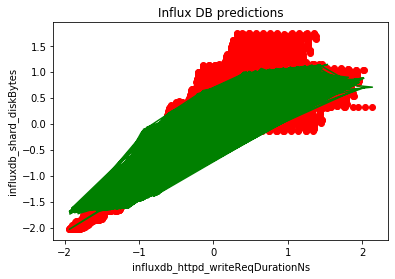

In [16]:
print( "plot for influxdb_shard_diskBytes")
print("\n")

plt.scatter(x1_train[:,7], y1_train, color = "red")
plt.plot(x1_train[:,7], lin_model1.predict(x1_train), color = "green")
plt.title("Influx DB predictions")
plt.xlabel("influxdb_httpd_writeReqDurationNs")
plt.ylabel("influxdb_shard_diskBytes")
plt.show()

plot for cpu_usage_active




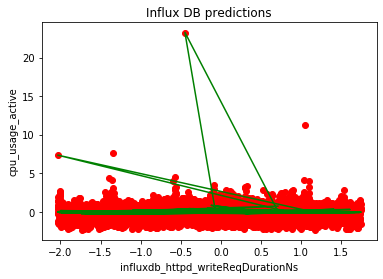

In [17]:
print( "plot for cpu_usage_active")
print("\n")

plt.scatter(x2_train[:,7], y2_train, color = "red")
plt.plot(x2_train[:,7], lin_model2.predict(x2_train), color = "green")
plt.title("Influx DB predictions")
plt.xlabel("influxdb_httpd_writeReqDurationNs")
plt.ylabel("cpu_usage_active")
plt.show()

plot for disk_used_percent




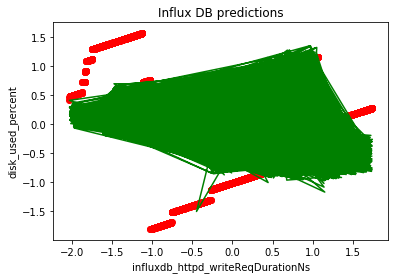

In [18]:
print( "plot for disk_used_percent")
print("\n")

plt.scatter(x3_train[:,7], y3_train, color = "red")
plt.plot(x3_train[:,7], lin_model3.predict(x3_train), color = "green")
plt.title("Influx DB predictions")
plt.xlabel("influxdb_httpd_writeReqDurationNs")
plt.ylabel("disk_used_percent")
plt.show()

# polynomial regression

In [19]:
polynomial_features= PolynomialFeatures(degree = 4)
X1_poly =polynomial_features.fit_transform(X1)
X2_poly =polynomial_features.fit_transform(x2)
X3_poly =polynomial_features.fit_transform(x3)


In [21]:
X1_poly = np.array(X1_poly)
y1 = np.array(y1)

X2_poly = np.array(X2_poly)
y2 = np.array(y2)

X3_poly = np.array(X3_poly)
y3 = np.array(y3)

x1_train,x1_test,y1_train,y1_test = train_test_split(X1_poly, y1, test_size = 0.2,random_state=1)
x2_train,x2_test,y2_train,y2_test = train_test_split(X2_poly, y2, test_size = 0.2,random_state=1)
x3_train,x3_test,y3_train,y3_test = train_test_split(X3_poly, y3, test_size = 0.2,random_state=1)


In [22]:
lin_model1 = LinearRegression()
lin_model2 = LinearRegression()
lin_model3 = LinearRegression()

print(lin_model1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [23]:
poly_model1 = lin_model1.fit(x1_train,y1_train)
poly_model2 = lin_model2.fit(x2_train,y2_train)
poly_model3 = lin_model3.fit(x3_train,y3_train)

In [24]:
y1_pred = poly_model1.predict(x1_test)
print("\nPredicted 'influxdb_shard_diskBytes' \n",y1_pred)
y2_pred = poly_model2.predict(x2_test)
print("\nPredicted 'cpu_usage_active' \n",y2_pred)
y3_pred = poly_model3.predict(x3_test)
print("\nPredicted ''disk_used_percent'' \n",y3_pred)


Predicted 'influxdb_shard_diskBytes' 
 [ 0.82861287  0.17699207  0.63561441 ... -0.32969701  1.53003173
  0.51482347]

Predicted 'cpu_usage_active' 
 [ 0.20090861 -0.21576825 -0.53698075 ...  0.00670315 -1.39234691
 -0.17066534]

Predicted ''disk_used_percent'' 
 [ 1.04981602  0.5778571  -0.58679229 ... -1.3189114   0.10372748
 -0.63319441]


In [25]:
print('Coefficient of determination (influxdb_shard_diskBytes): %.2f'% r2_score(y1_test,y1_pred ))
print("RMSE for linear (influxdb_shard_diskBytes) :",np.sqrt(mean_squared_error(y1_test,y1_pred)))
print('\n')

print('Coefficient of determination (cpu_usage_active): %.2f'% r2_score(y2_test,y2_pred ))
print("RMSE for linear (cpu_usage_active) :",np.sqrt(mean_squared_error(y2_test,y2_pred)))
print('\n')

print('Coefficient of determination (disk_used_percent): %.2f'% r2_score(y3_test,y3_pred ))
print("RMSE for linear (disk_used_percent) :",np.sqrt(mean_squared_error(y3_test,y3_pred)))
print('\n')


Coefficient of determination (influxdb_shard_diskBytes): 0.96
RMSE for linear (influxdb_shard_diskBytes) : 0.18673515827144385


Coefficient of determination (cpu_usage_active): -4.21
RMSE for linear (cpu_usage_active) : 2.2084708578452608


Coefficient of determination (disk_used_percent): 0.87
RMSE for linear (disk_used_percent) : 0.36432490062349215




plot for influxdb_shard_diskBytes




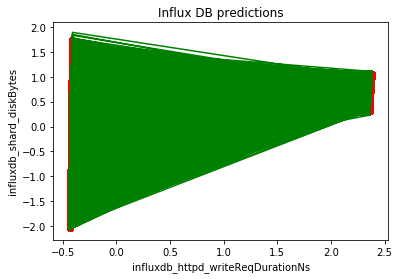

In [26]:
print( "plot for influxdb_shard_diskBytes")
print("\n")

plt.scatter(x1_train[:,7], y1_train, color = "red")
plt.plot(x1_train[:,7], poly_model1.predict(x1_train), color = "green")
plt.title("Influx DB predictions")
plt.xlabel("influxdb_httpd_writeReqDurationNs")
plt.ylabel("influxdb_shard_diskBytes")
plt.show()

plot for cpu_usage_active




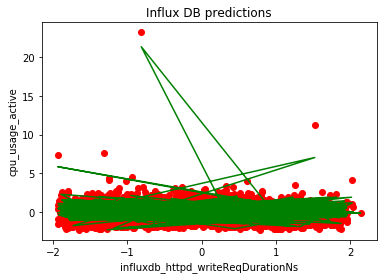

In [27]:
print( "plot for cpu_usage_active")
print("\n")

plt.scatter(x2_train[:,7], y2_train, color = "red")
plt.plot(x2_train[:,7], poly_model2.predict(x2_train), color = "green")
plt.title("Influx DB predictions")
plt.xlabel("influxdb_httpd_writeReqDurationNs")
plt.ylabel("cpu_usage_active")
plt.show()

plot for disk_used_percent




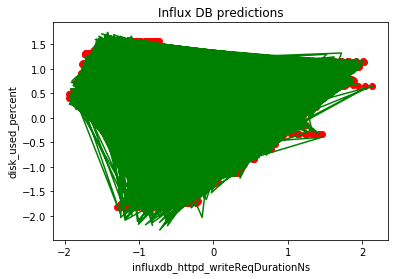

In [28]:
print( "plot for disk_used_percent")
print("\n")

plt.scatter(x3_train[:,7], y3_train, color = "red")
plt.plot(x3_train[:,7], poly_model3.predict(x3_train), color = "green")
plt.title("Influx DB predictions")
plt.xlabel("influxdb_httpd_writeReqDurationNs")
plt.ylabel("disk_used_percent")
plt.show()

In [29]:
import pickle
pickle.dump(lin_model1, open('saved model/scale all/poly_trained_model1.pkl', 'wb'))
pickle.dump(lin_model2, open('saved model/scale all/poly_trained_model2.pkl', 'wb'))
pickle.dump(lin_model3, open('saved model/scale all/poly_trained_model3.pkl', 'wb'))

# Support Vector Regression

In [30]:
X1 = np.array(X1)
y1 = np.array(y1)

X2 = np.array(x2)
y2 = np.array(y2)

X3 = np.array(x3)
y3 = np.array(y3)

x1_train,x1_test,y1_train,y1_test = train_test_split(X1, y1, test_size = 0.2,random_state=1)
x2_train,x2_test,y2_train,y2_test = train_test_split(X2, y2, test_size = 0.2,random_state=1)
x3_train,x3_test,y3_train,y3_test = train_test_split(X3, y3, test_size = 0.2,random_state=1)


In [31]:
svr_model1 = SVR(kernel = 'rbf', gamma = 0.1)
svr_model2 = SVR(kernel = 'rbf', gamma = 0.1)
svr_model3 = SVR(kernel = 'rbf', gamma = 0.1)

In [32]:
svr_model1 = svr_model1.fit(x1_train,y1_train)
svr_model2 = svr_model2.fit(x2_train,y2_train)
svr_model3 = svr_model3.fit(x3_train,y3_train)

In [33]:
y1_pred = svr_model1.predict(x1_test)
print("\nPredicted 'influxdb_shard_diskBytes' \n",y1_pred)
y2_pred = svr_model2.predict(x2_test)
print("\nPredicted 'cpu_usage_active' \n",y2_pred)
y3_pred = svr_model3.predict(x3_test)
print("\nPredicted ''disk_used_percent'' \n",y3_pred)


Predicted 'influxdb_shard_diskBytes' 
 [ 0.78131333  0.35168312  0.75915922 ... -0.30865011  1.23700959
  0.55054767]

Predicted 'cpu_usage_active' 
 [0.0959111  0.04264682 0.24940513 ... 0.36418401 0.07530124 0.26494075]

Predicted ''disk_used_percent'' 
 [ 0.98728734  0.50078233 -0.46560492 ... -1.28686844  0.1017216
 -0.59589031]


In [34]:
print('Coefficient of determination (influxdb_shard_diskBytes): %.2f'% r2_score(y1_test,y1_pred ))
print("RMSE for linear (influxdb_shard_diskBytes) :",np.sqrt(mean_squared_error(y1_test,y1_pred)))
print('\n')

print('Coefficient of determination (cpu_usage_active): %.2f'% r2_score(y2_test,y2_pred ))
print("RMSE for linear (cpu_usage_active) :",np.sqrt(mean_squared_error(y2_test,y2_pred)))
print('\n')

print('Coefficient of determination (disk_used_percent): %.2f'% r2_score(y3_test,y3_pred ))
print("RMSE for linear (disk_used_percent) :",np.sqrt(mean_squared_error(y3_test,y3_pred)))
print('\n')


Coefficient of determination (influxdb_shard_diskBytes): 0.96
RMSE for linear (influxdb_shard_diskBytes) : 0.2053119190941349


Coefficient of determination (cpu_usage_active): -0.02
RMSE for linear (cpu_usage_active) : 0.9762998323710381


Coefficient of determination (disk_used_percent): 0.84
RMSE for linear (disk_used_percent) : 0.3997626416106942




In [36]:
import pickle
pickle.dump(svr_model1, open('saved model/scale all/svr_trained_model1.pkl', 'wb'))
pickle.dump(svr_model2, open('saved model/scale all/svr_trained_model2.pkl', 'wb'))
pickle.dump(svr_model3, open('saved model/scale all/svr_trained_model3.pkl', 'wb'))

plot for influxdb_shard_diskBytes




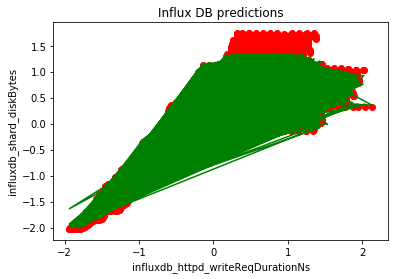

In [37]:
print( "plot for influxdb_shard_diskBytes")
print("\n")

plt.scatter(x1_train[:,7], y1_train, color = "red")
plt.plot(x1_train[:,7], svr_model1.predict(x1_train), color = "green")
plt.title("Influx DB predictions")
plt.xlabel("influxdb_httpd_writeReqDurationNs")
plt.ylabel("influxdb_shard_diskBytes")
plt.show()

plot for cpu_usage_active




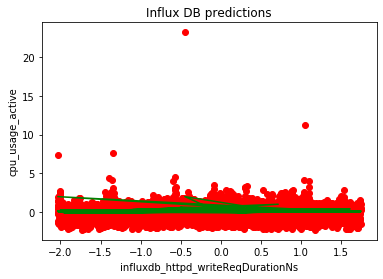

In [38]:
print( "plot for cpu_usage_active")
print("\n")

plt.scatter(x2_train[:,7], y2_train, color = "red")
plt.plot(x2_train[:,7], svr_model2.predict(x2_train), color = "green")
plt.title("Influx DB predictions")
plt.xlabel("influxdb_httpd_writeReqDurationNs")
plt.ylabel("cpu_usage_active")
plt.show()

plot for disk_used_percent




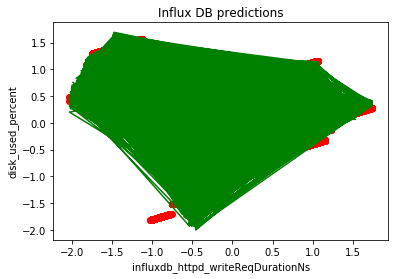

In [39]:
print( "plot for disk_used_percent")
print("\n")

plt.scatter(x3_train[:,7], y3_train, color = "red")
plt.plot(x3_train[:,7], svr_model3.predict(x3_train), color = "green")
plt.title("Influx DB predictions")
plt.xlabel("influxdb_httpd_writeReqDurationNs")
plt.ylabel("disk_used_percent")
plt.show()